In [7]:
import pandas as pd 
df = pd.read_csv("Advertising.csv", header = None)
df

,0,1,2,3,4
0,NaN,TV,Radio,Newspaper,Sales
1,1.0,230.1,37.8,69.2,22.1
2,2.0,44.5,39.3,45.1,10.4
3,3.0,17.2,45.9,69.3,9.3
4,4.0,151.5,41.3,58.5,18.5
...,...,...,...,...,...
196,196.0,38.2,3.7,13.8,7.6
197,197.0,94.2,4.9,8.1,9.7
198,198.0,177,9.3,6.4,12.8
199,199.0,283.6,42,66.2,25.5


In [8]:
df = df.drop(df.index[0])
df = df.reset_index(drop=True)
header = ['SN', 'TV', 'Radio', 'Newspaper', 'Sales']
df.columns = header
df

,SN,TV,Radio,Newspaper,Sales
0,1.0,230.1,37.8,69.2,22.1
1,2.0,44.5,39.3,45.1,10.4
2,3.0,17.2,45.9,69.3,9.3
3,4.0,151.5,41.3,58.5,18.5
4,5.0,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196.0,38.2,3.7,13.8,7.6
196,197.0,94.2,4.9,8.1,9.7
197,198.0,177,9.3,6.4,12.8
198,199.0,283.6,42,66.2,25.5


In [9]:
df = df.drop('SN', axis = 1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177,9.3,6.4,12.8
198,283.6,42,66.2,25.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TV         200 non-null    object
 1   Radio      200 non-null    object
 2   Newspaper  200 non-null    object
 3   Sales      200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [15]:
df['TV'] = df['TV'].astype(str).str.strip()
df['Radio'] = df['Radio'].astype(str).str.strip()
df['Newspaper'] = df['Newspaper'].astype(str).str.strip()
df['Sales'] = df['Sales'].astype(str).str.strip()

In [16]:
df['TV'] = pd.to_numeric(df['TV'], errors='coerce')
df['Radio'] = pd.to_numeric(df['Radio'], errors='coerce')
df['Newspaper'] = pd.to_numeric(df['Newspaper'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


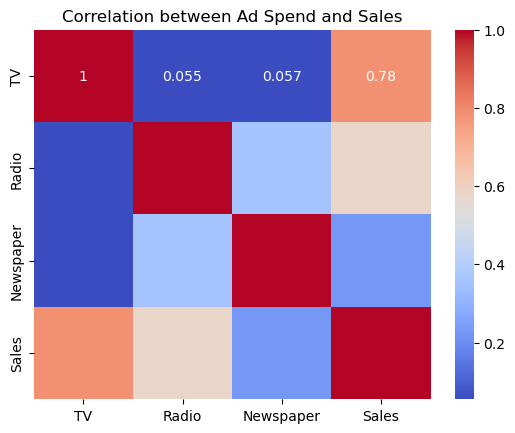

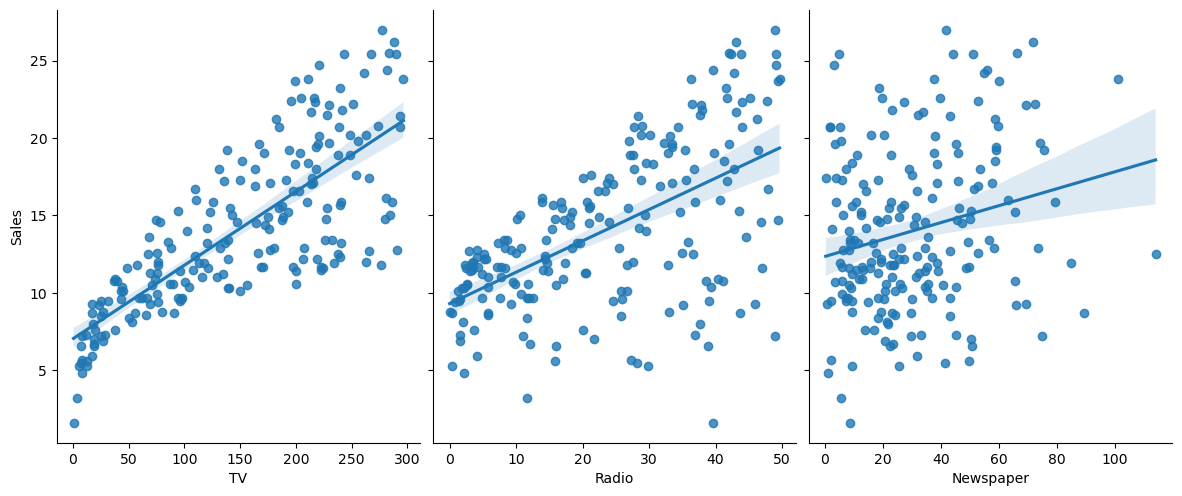

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Ad Spend and Sales")
plt.show()

# Visualize relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.show()

In [35]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [32]:
from sklearn.model_selection import train_test_split

# Define Features and Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[0:5]

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326])

In [34]:
model.score(X_test, y_test)

0.899438024100912

<h3>1. Prioritize TV Advertising for Maximum Sales</h3>
   The correlation scores and heatmap reveals that TV spend has the strongest positive relationship with Sales <span style="color: blue;">0.78</span>. This indicates that for every dollar spent, TV advertising is significantly more effective at driving sales than any other platform.Actionable Strategy: Allocate the largest portion of the marketing budget to TV campaigns to maximize overall revenue.
<h3>2. Optimize Radio for Supplementary Growth, reavaluate newspaper</h3>
   While not as dominant as TV, Radio shows a moderate positive correlation with Sales. The scatter plot for Radio demonstrates a clear upward trend, suggesting it is a reliable secondary driver of growth. Actionable Strategy: Use Radio as a cost-effective way to maintain brand frequency and support the primary TV campaigns. The scatter plot for Newspaper shows high variance and a much weaker correlation with Sales compared to the other platforms, either cut cost on newspapers or reavaluate marketing startegy with newspapers.